In [1]:
# GENERAL LIBRAIRIES IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# OWN LIBRAIRY IMPORT
from basic_sl import synthetise

In [3]:
# DATA IMPORT
netflix = pd.read_csv('../data/Netflix.csv')
netflix.drop('Unnamed: 0', axis = 1, inplace=True)
netflix.head()

,vote,before_90s,90s,2000s,movie,other,tv movie,video movie,Action,Documentary,...,Thriller,Romance,Other_genre,United States,United Kingdom,France,Other_country,English,Other_language,rating_category
0,-1.565669,0.0,1.0,0.0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,top_10pct
1,-1.565669,0.0,1.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,bottom_25pct
2,1.218334,0.0,0.0,1.0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,bottom_25pct
3,0.174333,0.0,1.0,0.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,bottom_25pct
4,-1.565669,1.0,0.0,0.0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,top_10pct


In [4]:
# SKLEARN IMPORTS
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
# DATA PREPARATION

X = netflix.drop('rating_category', axis = 1)
y = netflix.rating_category

# random_state = 42 for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
QuadraticDiscriminantAnalysis?

Init signature:
QuadraticDiscriminantAnalysis(
    *,
    priors=None,
    reg_param=0.0,
    store_covariance=False,
    tol=0.0001,
)
Docstring:     
Quadratic Discriminant Analysis.

A classifier with a quadratic decision boundary, generated
by fitting class conditional densities to the data
and using Bayes' rule.

The model fits a Gaussian density to each class.

.. versionadded:: 0.17
   *QuadraticDiscriminantAnalysis*

Read more in the :ref:`User Guide <lda_qda>`.

Parameters
----------
priors : ndarray of shape (n_classes,), default=None
    Class priors. By default, the class proportions are inferred from the
    training data.

reg_param : float, default=0.0
    Regularizes the per-class covariance estimates by transforming S2 as
    ``S2 = (1 - reg_param) * S2 + reg_param * np.eye(n_features)``,
    where S2 corresponds to the `scaling_` attribute of a given class.

store_covariance : bool, default=False
    If True, the class covariance matrices are explicitly computed and
 

In [7]:
# QUADRATIC DISCRIMINANT ANALYSIS

## Naive view: default hyperparameters & all features
### Model fitting
qdc = QuadraticDiscriminantAnalysis()
qdc.fit(X_train, y_train)

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [8]:
### Synthesis
synthetise(qdc, X_train, X_test, y_train, y_test)

QUADRATIC DISCRIMINANT ANALYSIS
TRAIN dataset
Accuracy score: 49.1%
Recall score (macro): 56.6%
Precision score (macro): 48.0%
ROC_AUC score (macro): 75.2%
Confusion matrix
[[ 903  390  158]
 [1226 1358  802]
 [  96  100  409]]
TEST dataset
Accuracy score: 48.3%
Recall score (macro): 54.1%
Precision score (macro): 46.1%
ROC_AUC score (macro): 73.1%
Confusion matrix
[[244 101  32]
 [303 337 211]
 [ 21  35  77]]


In [9]:
### Conclusions
#### Medium accuracy, sensitivy / recall and precision.
#### No overfit.
#### Collinearity issues: too many features? Let's try PCA.

In [18]:
## Feature selection: PCA

from sklearn.decomposition import PCA
features = X

pca = PCA(n_components=2)
components = pca.fit_transform(X)

# New features dataframe
pca_data = pd.DataFrame(data = components, columns = ['pc1', 'pc2'])

In [19]:
### Create dataframe with principal components and target variable
netflix_pca = pd.concat([pca_data, netflix[['rating_category']]], axis = 1)
netflix_pca

,pc1,pc2,rating_category
0,1.950590,-0.186070,top_10pct
1,0.871022,1.747542,bottom_25pct
2,-0.950349,-0.758824,bottom_25pct
3,0.034200,-0.819772,bottom_25pct
4,1.951101,-0.262044,top_10pct
...,...,...,...
6798,-1.408894,-1.176967,other
6799,-0.954198,0.782307,bottom_25pct
6800,0.496225,-0.949500,bottom_25pct
6801,-0.785268,-0.390136,other


In [14]:
### Data preparation
X_pca = netflix_pca.drop('rating_category', axis = 1)
y_pca = netflix_pca.rating_category

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

### Model init and fit
qdc_pca = QuadraticDiscriminantAnalysis()
qdc_pca.fit(X_train_pca, y_train_pca)

# Synthesis
synthetise(qdc_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca)

QUADRATIC DISCRIMINANT ANALYSIS
TRAIN dataset
Accuracy score: 62.2%
Recall score (macro): 33.3%
Precision score (macro): 20.7%
ROC_AUC score (macro): 68.8%
Confusion matrix
[[   0 1451    0]
 [   0 3386    0]
 [   0  605    0]]
TEST dataset
Accuracy score: 62.5%
Recall score (macro): 33.3%
Precision score (macro): 20.8%
ROC_AUC score (macro): 65.2%
Confusion matrix
[[  0 377   0]
 [  0 851   0]
 [  0 133   0]]


/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


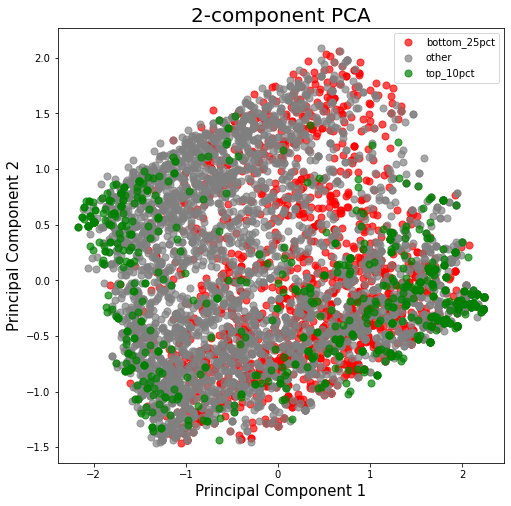

In [17]:
### Better accuracy and no overfit. Sensitivity / recall and precision are very poor.
### Indeed the model thinks that everything is "other".
### Let's plot it.

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
rating_categories = y_train.unique()
colors = ['red', 'grey', 'green']
d = dict()
for rating_category, color in zip(categories,colors):
    indicesToKeep = netflix_pca['rating_category'] == rating_category
    d[rating_category] = len(indicesToKeep)
    ax.scatter(netflix_pca.loc[indicesToKeep, 'pc1']
               , netflix_pca.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50
               , alpha = 0.7)
ax.legend(rating_categories)
plt.show()

In [ ]:
### All categories overlap, so the main one (65% of the dataset) dominates.
### To be definitely rejected.